# Travel Destination Recommendation System Notebook

#### Authors
* 1
* 2 
* 3
* 4
* 5
* 6


## Problem Statement

The goal is to build a machine learning model that can predict hotel ratings based on customer reviews, budget, specific locations, and the type of residence. The dataset is scraped from TripAdvisor and it contains information about various hotels, including their ratings, reviews, amenities, pricing, geographical coordinates, and residence types (e.g., hotel, bed and breakfast, specialty lodging). By analyzing the text reviews along with these additional factors, the objective is to develop a model that can accurately predict the ratings of new, unseen hotels based on customer reviews, budget constraints, location preferences, and residence type.

Approach:

Data Preprocessing: Clean and preprocess the text reviews by removing stopwords, punctuation, and performing tokenization. Convert the text data into a numerical representation suitable for modeling. Handle missing values, if any, in the budget, location, and residence type columns.

Feature Engineering: Extract additional features from the dataset, such as review sentiment scores, review length, and any other relevant information. Engineer new features related to budget, location, and residence type, such as price range categories, geographical distance from landmarks, and one-hot encoding of residence types.

Model Selection: Experiment with different supervised learning models, such as linear regression, decision trees, random forests, or neural networks, to find the best model for predicting hotel ratings considering customer reviews, budget, location, and residence type. Evaluate the models using appropriate evaluation metrics like mean squared error (MSE) or mean absolute error (MAE).

Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected model on the training set and evaluate its performance on the testing set. Fine-tune the model parameters to improve its accuracy. Perform cross-validation to assess the model's generalization capabilities.

## Objectives

## Data Understanding

In [89]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re
import folium

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

In [90]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [91]:
json_files = ['Data/botswana.json', 'Data/capeverde.json', 'Data/drc.json', 'Data/egypt.json', 'Data/ghana.json', 'Data/kenya.json',
              'Data/madagascar.json', 'Data/malawi.json', 'Data/morocco.json', 'Data/namibia.json', 'Data/nigeria.json', 'Data/rwanda.json',
              'Data/senegal.json', 'Data/seychelles.json', 'Data/south_africa.json', 'Data/tanzania.json', 'Data/uganda.json', 'Data/zambia.json']
df = read_json_files(json_files)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     33716 non-null  object 
 1   type                   33716 non-null  object 
 2   category               33716 non-null  object 
 3   subcategories          32377 non-null  object 
 4   name                   33716 non-null  object 
 5   locationString         32377 non-null  object 
 6   description            19187 non-null  object 
 7   image                  27084 non-null  object 
 8   photoCount             33716 non-null  int64  
 9   awards                 32377 non-null  object 
 10  rankingPosition        25113 non-null  float64
 11  rating                 25250 non-null  float64
 12  rawRanking             25113 non-null  float64
 13  phone                  23419 non-null  object 
 14  address                32374 non-null  object 
 15  ad

In [93]:
#check for null values
df.isnull().sum()

id                   0
type                 0
category             0
subcategories     1339
name                 0
                 ...  
photos           32377
bedroomInfo      32377
bathroomInfo     32377
bathCount        32377
baseDailyRate    32448
Length: 65, dtype: int64

In [94]:
#prnt columns
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'localLangCode', 'isClosed', 'isLongClosed',
       'openNowText', 'cuisines', 'mealTypes', 'dishes', 'features',
       'dietaryRestrictions', 'hours', 'menuWebUrl', 'establishmentTypes',
       'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions',
       'photos', 'bedroomInfo', '

### Data Cleaning

#### Removing Irrelevant columns
There are several columns and attributes that are not useful for our analysis. These include **'image'**, **'photoCount'**, **'awards'**, **'phone'**, **'address'** , **'email'** **'webUrl'**, **'website'** **'neighborhoodLocations'**, **'nearestMetroStations'**, **'booking'**, **'offerGroup'**, **'subtype'**, **'hotelClass'**, **'roomTips'**, **'checkInDate'**, **'checkOutDate'**, **'offers'**, **'hotelClassAttribution'**, **'localLangCode'**, **'isClosed'**, **'isLongClosed'**, **'openNowText'**, **'dietaryRestrictions'**, **'hours'**, **'menuWebUrl'**, **'establishmentTypes'**, **'ownersTopReasons'**, **'guideFeaturedInCopy'**, **'rentalDescriptions'** and **'photos'**.

In [95]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,id,type,category,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,3.0,4.5,3.155229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,7.0,3.5,2.956184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,5.0,4.5,2.974105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,3.0,4.5,3.029962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,8.0,4.0,2.944026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling Missing values

In [96]:
# define a function that finds the percentage of missing values of all column 

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_above_50_percent = column_percentages[column_percentages > 50]
print(columns_above_50_percent)

localAddress     88.091707
numberOfRooms    51.856685
priceLevel       59.496975
priceRange       59.769842
cuisines         98.766164
mealTypes        98.766164
dishes           98.766164
features         98.766164
bedroomInfo      96.028592
bathroomInfo     96.028592
bathCount        96.028592
baseDailyRate    96.239174
dtype: float64


#### **`price` columns**

Price is an important factor in calculating the similarity of places in this context. We should **impute** missing values in this columns instead of dropping them

In [97]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]

,priceLevel,priceRange,type
0,NaN,NaN,ATTRACTION
1,NaN,NaN,ATTRACTION
2,NaN,NaN,ATTRACTION
3,NaN,NaN,ATTRACTION
4,NaN,NaN,ATTRACTION


The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [98]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

,id,type,category,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,...,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate,LowerPrice,UpperPrice
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",None,3.0,4.5,3.155229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,281.0
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",None,7.0,3.5,2.956184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,281.0
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",None,5.0,4.5,2.974105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,281.0
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",This region of Chobe National Park is known as...,3.0,4.5,3.029962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,281.0
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",None,8.0,4.0,2.944026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,281.0


Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

In [99]:
# Check null values and filter columns with more than 4000 null values
null_counts = df.isnull().sum()
columns_above_threshold = null_counts[null_counts > 10000].index

# Print the columns with more than 4000 null values
list(columns_above_threshold)


['description',
 'localAddress',
 'numberOfRooms',
 'priceLevel',
 'priceRange',
 'cuisines',
 'mealTypes',
 'dishes',
 'features',
 'bedroomInfo',
 'bathroomInfo',
 'bathCount',
 'baseDailyRate']

In [100]:
# we will drop the following columns because they do not have any contribution to our objectives.
# some also contain too many null values to fill. 
cols_to_drop = columns_above_threshold 

df.drop(columns=cols_to_drop, inplace=True)
list(df.columns)

['id',
 'type',
 'category',
 'subcategories',
 'name',
 'locationString',
 'rankingPosition',
 'rating',
 'rawRanking',
 'addressObj',
 'localName',
 'latitude',
 'longitude',
 'rankingString',
 'rankingDenominator',
 'ancestorLocations',
 'ratingHistogram',
 'numberOfReviews',
 'reviewTags',
 'reviews',
 'amenities',
 'LowerPrice',
 'UpperPrice']

>> We create a new df for review information

#### **`amenities` column**

In [101]:
# print out missing values in amenities
df['amenities'].isna().sum()

9200

>>>> There are some missing values in amenities. Lets inspect the `type` feature. It may help us fill these inconsistencies.

#### **`type` column**

In [102]:
df['type'].value_counts()

HOTEL              23177
ATTRACTION          8784
VACATION_RENTAL     1339
RESTAURANT           416
Name: type, dtype: int64

Now we fill missing values in `amenities` with amenities you would typically find in that type of attraction

In [103]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'bathroom'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom '
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,rankingString,rankingDenominator,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities,LowerPrice,UpperPrice
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,#3 of 5 things to do in Okavango Delta,5,"[{'id': '472673', 'name': 'Okavango Delta', 'a...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",45,[],[],bathroom,141.0,281.0
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,#7 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 4, 'count2': 11, 'count3': 35, 'cou...",115,"[{'text': 'eland', 'reviews': 7}, {'text': 'an...",[],bathroom,141.0,281.0
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,#5 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",23,[],[],bathroom,141.0,281.0
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,#3 of 8 things to do in Chobe National Park,8,"[{'id': '472669', 'name': 'Chobe National Park...","{'count1': 2, 'count2': 0, 'count3': 0, 'count...",34,"[{'text': 'the river', 'reviews': 6}, {'text':...",[],bathroom,141.0,281.0
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,#8 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 1, 'count3': 6, 'count...",29,"[{'text': 'bucket shower', 'reviews': 5}, {'te...",[],bathroom,141.0,281.0


In [104]:
# confirm no missing vals
df['amenities'].isna().sum()

0

In [105]:
review_df = pd.DataFrame(df, columns=['numberOfReviews',
                                                'reviewTags', 'reviews'])
review_df['reviewTags'][5]

[{'text': 'one night', 'reviews': 2},
 {'text': 'farm', 'reviews': 14},
 {'text': 'lucy', 'reviews': 13},
 {'text': 'botswana', 'reviews': 11},
 {'text': 'stay', 'reviews': 5},
 {'text': 'host', 'reviews': 5},
 {'text': 'dinner', 'reviews': 5},
 {'text': 'chickens', 'reviews': 2},
 {'text': 'nata', 'reviews': 2},
 {'text': 'campfire', 'reviews': 2},
 {'text': 'breakfast', 'reviews': 2},
 {'text': 'food', 'reviews': 4},
 {'text': 'gaborone', 'reviews': 2}]

In [106]:
#number of missing values in reviews column
df['reviewTags'].isnull().sum()

1339

- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

In [107]:
###
###
    # SEEK CLARIFICATION (KANE)
###
###
df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
df['reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,rankingString,rankingDenominator,ancestorLocations,ratingHistogram,numberOfReviews,reviewTags,reviews,amenities,LowerPrice,UpperPrice
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,#3 of 5 things to do in Okavango Delta,5,"[{'id': '472673', 'name': 'Okavango Delta', 'a...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",45,[],[],bathroom,141.0,281.0
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,#7 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 4, 'count2': 11, 'count3': 35, 'cou...",115,"[eland, animals]",[],bathroom,141.0,281.0
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,#5 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 0, 'count3': 0, 'count...",23,[],[],bathroom,141.0,281.0
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,#3 of 8 things to do in Chobe National Park,8,"[{'id': '472669', 'name': 'Chobe National Park...","{'count1': 2, 'count2': 0, 'count3': 0, 'count...",34,"[the river, hippos, chobe]",[],bathroom,141.0,281.0
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,#8 of 25 things to do in Gaborone,25,"[{'id': '293767', 'name': 'Gaborone', 'abbrevi...","{'count1': 0, 'count2': 1, 'count3': 6, 'count...",29,"[bucket shower, game reserve, latrine, hartebe...",[],bathroom,141.0,281.0


In [108]:
# inspect some columns of interest
cols_to_inspect = ['locationString', 'rankingPosition', 'rawRanking',
    'rankingString', 'rankingDenominator', 'name', 
    'rankingString', 'type']

df[cols_to_inspect]

,locationString,rankingPosition,rawRanking,rankingString,rankingDenominator,name,rankingString,type
0,"Okavango Delta, North-West District",3.0,3.155229,#3 of 5 things to do in Okavango Delta,5,Khwai River Bridge,#3 of 5 things to do in Okavango Delta,ATTRACTION
1,"Gaborone, South-East District",7.0,2.956184,#7 of 25 things to do in Gaborone,25,Gaborone Game Reserve,#7 of 25 things to do in Gaborone,ATTRACTION
2,"Gaborone, South-East District",5.0,2.974105,#5 of 25 things to do in Gaborone,25,ISKCON Gaborone,#5 of 25 things to do in Gaborone,ATTRACTION
3,"Chobe National Park, North-West District",3.0,3.029962,#3 of 8 things to do in Chobe National Park,8,Serondela Reserve,#3 of 8 things to do in Chobe National Park,ATTRACTION
4,"Gaborone, South-East District",8.0,2.944026,#8 of 25 things to do in Gaborone,25,Khutse Game Reserve,#8 of 25 things to do in Gaborone,ATTRACTION
...,...,...,...,...,...,...,...,...
33711,"Choma, Southern Province",NaN,NaN,None,None,Kavango Lodge,None,HOTEL
33712,"Sioma, Western Province",NaN,NaN,None,None,Kavumbu Camp,None,HOTEL
33713,"Lusaka, Lusaka Province",NaN,NaN,None,None,Imperial Lodges,None,HOTEL
33714,"Magoye, Southern Province",NaN,NaN,None,None,Two Rivers Country Lodge,None,HOTEL


#### **`rankingDenominator`**, **`rankingString`**, **`rawRanking`**, **`rankingPosition`** and **`rating`**

In [109]:
# inspect cols
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

,rankingDenominator,rankingString,rawRanking,rankingPosition,rating,type
0,5,#3 of 5 things to do in Okavango Delta,3.155229,3.0,4.5,ATTRACTION
1,25,#7 of 25 things to do in Gaborone,2.956184,7.0,3.5,ATTRACTION
2,25,#5 of 25 things to do in Gaborone,2.974105,5.0,4.5,ATTRACTION
3,8,#3 of 8 things to do in Chobe National Park,3.029962,3.0,4.5,ATTRACTION
4,25,#8 of 25 things to do in Gaborone,2.944026,8.0,4.0,ATTRACTION


The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **`rankingDenominator`**, **`rankingString`**, **`rawRanking`** and **`rankingPosition`**

In [110]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

In [111]:
#inspect rankingtypes
df.RankingType.value_counts()

                             9267
Specialty lodging            7026
B&Bs / Inns                  5653
hotels                       4423
things to do                 3142
Outdoor Activities           1118
Tours                         613
Boat Tours & Water Sports     543
Transportation                492
places to eat                 326
hotel                         228
B&B / Inn                     225
Shopping                      155
Food & Drink                  143
Nightlife                     118
Spas & Wellness               112
Fun & Games                    70
Classes & Workshops            35
Nature & Parks                 11
Concerts & Shows                7
Museums                         6
Water & Amusement Parks         1
Traveler Resources              1
Sights & Landmarks              1
Name: RankingType, dtype: int64

After splitting the rankingString column to their respective elements. we observe below that the new column ranking type has some elements that are similar but grouped differently. 

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [112]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn': 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging'
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)
df

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,numberOfReviews,reviewTags,reviews,amenities,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,45,[],[],bathroom,141.000000,281.000000,things to do,Okavango Delta,3,5
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,115,"[eland, animals]",[],bathroom,141.000000,281.000000,things to do,Gaborone,7,25
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,23,[],[],bathroom,141.000000,281.000000,things to do,Gaborone,5,25
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,34,"[the river, hippos, chobe]",[],bathroom,141.000000,281.000000,things to do,Chobe National Park,3,8
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,29,"[bucket shower, game reserve, latrine, hartebe...",[],bathroom,141.000000,281.000000,things to do,Gaborone,8,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33711,19999439,HOTEL,hotel,[Bed and Breakfast],Kavango Lodge,"Choma, Southern Province",NaN,NaN,NaN,"{'street1': 'Plot # 314 Riverside', 'street2':...",...,0,[],[],"[restaurant, bathroom, room]",14242.215321,23833.405839,,,,
33712,17768690,HOTEL,hotel,[Bed and Breakfast],Kavumbu Camp,"Sioma, Western Province",NaN,NaN,NaN,"{'street1': None, 'street2': None, 'city': 'Si...",...,0,[],[],"[restaurant, bathroom, room]",10127.000000,10408.000000,,,,
33713,8581399,HOTEL,hotel,[Specialty Lodging],Imperial Lodges,"Lusaka, Lusaka Province",NaN,NaN,NaN,"{'street1': 'Plot No 406 Kudu Road', 'street2'...",...,0,[],[],"[Kids Activities, Restaurant, Bar/Lounge, Hot ...",14242.215321,23833.405839,,,,
33714,19139446,HOTEL,hotel,[Hotel],Two Rivers Country Lodge,"Magoye, Southern Province",NaN,NaN,NaN,"{'street1': None, 'street2': None, 'city': 'Ma...",...,0,[],[],"[restaurant, bathroom, room]",14242.215321,23833.405839,,,,


In [113]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

In [114]:
df['RankingType'].isna().sum()

0

#### **`rating` column**

In [115]:
#nulls in rating column
df['rating'].isna().sum()

8466

We will fill rating with 0 for now

In [116]:
df['rating'].fillna(0, inplace=True)

**`numberOfReviews`,`reviewTags` and `reviews` columns**

In [117]:
df[['numberOfReviews','reviewTags', 'reviews']]

,numberOfReviews,reviewTags,reviews
0,45,[],[]
1,115,"[eland, animals]",[]
2,23,[],[]
3,34,"[the river, hippos, chobe]",[]
4,29,"[bucket shower, game reserve, latrine, hartebe...",[]
...,...,...,...
33711,0,[],[]
33712,0,[],[]
33713,0,[],[]
33714,0,[],[]


- The *`numberOfReviews` column* represent the number of reviews for each tourist destination.

- The *`reviews` column* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *`reviewTags` column* are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.

In [118]:
##
##
##  Seek CLarification (KANE)
##  Throws error
##
##

# def clean_review_tags(df):
#     """function to clean review tags"""
#     df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
#     df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
#     return df

# df_filtered = clean_review_tags(df)
# df_filtered.head()


#### `longitude` and `latitude` columns

In [119]:
df.head()[['longitude','latitude', 'Location']]

,longitude,latitude,Location
0,NaN,NaN,Okavango Delta
1,NaN,NaN,Gaborone
2,25.89846,-24.65297,Gaborone
3,NaN,NaN,Chobe National Park
4,NaN,NaN,Gaborone


We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [120]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)

#### **`subcategories`**

In [121]:
df[['subcategories', 'type']]

,subcategories,type
0,[Sights & Landmarks],ATTRACTION
1,[Nature & Parks],ATTRACTION
2,[Sights & Landmarks],ATTRACTION
3,[Nature & Parks],ATTRACTION
4,[Nature & Parks],ATTRACTION
...,...,...
33711,[Bed and Breakfast],HOTEL
33712,[Bed and Breakfast],HOTEL
33713,[Specialty Lodging],HOTEL
33714,[Hotel],HOTEL


Filtering the DataFrame to include only rows where the `type` column is *VACATION_RENTAL* and assigning the missing values in the `subcategories` column of those rows with a list containing only the value `Specialty Lodging`.

In [122]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [123]:
df['subcategories'].isna().sum()

0

#### `addressObj` column

In [124]:
#preview the data
df['addressObj'][0]

{'street1': '',
 'street2': '',
 'city': None,
 'state': None,
 'country': 'Botswana',
 'postalcode': ''}

In [125]:
# inspect missing vlue percentage
missing_values_percentage(df['addressObj'])

3.9714082334796537

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [126]:
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,reviewTags,reviews,amenities,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,[],[],bathroom,141.0,281.0,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,"[eland, animals]",[],bathroom,141.0,281.0,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,[],[],bathroom,141.0,281.0,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,"[the river, hippos, chobe]",[],bathroom,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,"[bucket shower, game reserve, latrine, hartebe...",[],bathroom,141.0,281.0,things to do,Gaborone,8,25,Botswana


In [127]:
# lets have a look at our df now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33716 non-null  object 
 1   type                33716 non-null  object 
 2   category            33716 non-null  object 
 3   subcategories       33716 non-null  object 
 4   name                33716 non-null  object 
 5   locationString      32377 non-null  object 
 6   rankingPosition     25113 non-null  float64
 7   rating              33716 non-null  float64
 8   rawRanking          25113 non-null  float64
 9   addressObj          32377 non-null  object 
 10  localName           32377 non-null  object 
 11  latitude            33716 non-null  float64
 12  longitude           33716 non-null  float64
 13  rankingString       25113 non-null  object 
 14  rankingDenominator  25113 non-null  object 
 15  ancestorLocations   32377 non-null  object 
 16  rati

>> There still appear to be some missing values

In [128]:
#print out missing val percentages
missing_values_percentage(df)

id                     0.000000
type                   0.000000
category               0.000000
subcategories          0.000000
name                   0.000000
locationString         3.971408
rankingPosition       25.516075
rating                 0.000000
rawRanking            25.516075
addressObj             3.971408
localName              3.971408
latitude               0.000000
longitude              0.000000
rankingString         25.516075
rankingDenominator    25.516075
ancestorLocations      3.971408
ratingHistogram        3.971408
numberOfReviews        0.000000
reviewTags             0.000000
reviews                0.000000
amenities              0.000000
LowerPrice             4.846364
UpperPrice             4.846364
RankingType            0.000000
Location               0.000000
Numerator              0.000000
Denominator            0.000000
country                3.971408
dtype: float64

## EDA and Data Munging

We should begin by plotting a map of to show the distribution of our datapoints on the ground

In [ ]:
# Filter data by longitude and latitude range
data = df[(df['longitude'] >= -170) & (df['longitude'] <= 600) & (df['latitude'] >= -90) & (df['latitude'] <= 90)]

# Create a map centered on the first point in the filtered data
map = folium.Map(location=[data.iloc[0]['latitude'], data.iloc[0]['longitude']])

# Add markers for each point in the filtered data
for _, row in data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(map)

# Display the map
map

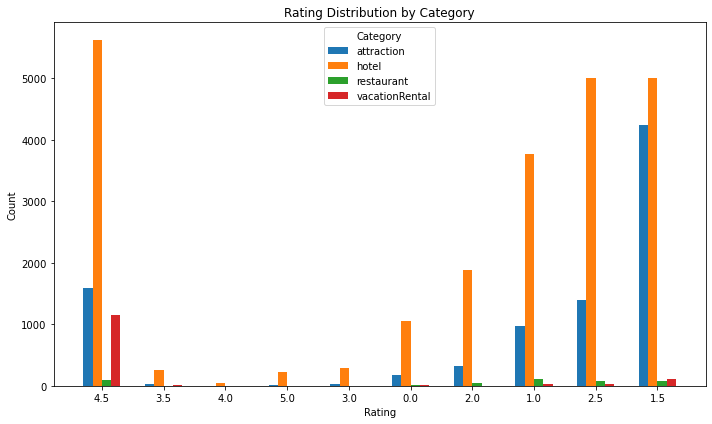

In [129]:
###
###
    # VISUALIZATION BY KIBET, THROWS ERROR NEEDS ATTENTION
##
##
#visualizing ratings per tourist destination category 

# Group the ratings by category
grouped_data = df.groupby('category')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['category'].unique()
ratings = df['rating'].unique()
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
    # Set the x-axis labels and ticks
    ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
    ax.set_xticklabels(ratings)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')
    ax.set_title('Rating Distribution by Category')
    ax.legend(title='Category')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

* from the chart above it can be seen that `hotel` category had higher ratings with an average rate of `4.0` followed by `attraction` while restaurants had lowest ratings based on catratingsegories over `3.5` 
* Despite having good  the same too were rated poorly by customers hith `hotel` and `attraction` leading with rates of `1.5, 1.0` and `2.0` respectively. 

In [130]:
df.head()

,id,type,category,subcategories,name,locationString,rankingPosition,rating,rawRanking,addressObj,...,reviewTags,reviews,amenities,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,country
0,1171922,ATTRACTION,attraction,[Sights & Landmarks],Khwai River Bridge,"Okavango Delta, North-West District",3.0,4.5,3.155229,"{'street1': '', 'street2': '', 'city': None, '...",...,[],[],bathroom,141.0,281.0,things to do,Okavango Delta,3,5,Botswana
1,2513264,ATTRACTION,attraction,[Nature & Parks],Gaborone Game Reserve,"Gaborone, South-East District",7.0,3.5,2.956184,"{'street1': '', 'street2': '', 'city': 'Gaboro...",...,"[eland, animals]",[],bathroom,141.0,281.0,things to do,Gaborone,7,25,Botswana
2,3247057,ATTRACTION,attraction,[Sights & Landmarks],ISKCON Gaborone,"Gaborone, South-East District",5.0,4.5,2.974105,"{'street1': 'Masokwe 18678', 'street2': 'West ...",...,[],[],bathroom,141.0,281.0,things to do,Gaborone,5,25,Botswana
3,478934,ATTRACTION,attraction,[Nature & Parks],Serondela Reserve,"Chobe National Park, North-West District",3.0,4.5,3.029962,"{'street1': '', 'street2': '', 'city': None, '...",...,"[the river, hippos, chobe]",[],bathroom,141.0,281.0,things to do,Chobe National Park,3,8,Botswana
4,7931216,ATTRACTION,attraction,[Nature & Parks],Khutse Game Reserve,"Gaborone, South-East District",8.0,4.0,2.944026,"{'street1': None, 'street2': None, 'city': 'Ga...",...,"[bucket shower, game reserve, latrine, hartebe...",[],bathroom,141.0,281.0,things to do,Gaborone,8,25,Botswana


## Modelling

## Model Evaluation

## Tuning

## Deployment

## Conclusion and Recommendations